File header: b'%PDF-1.7\n%'
could not load as CSV: 'charmap' codec can't decode byte 0x8d in position 81: character maps to <undefined>


TypeError: Image data of dtype object cannot be converted to float

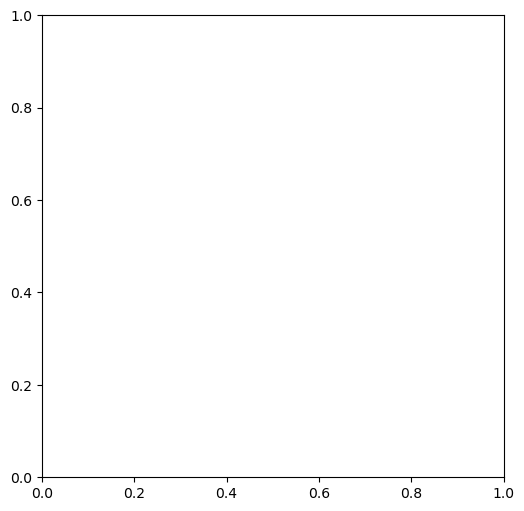

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/ander/python_decal_fa25/Alysah/homework11/astro_image.csv"

#The file I downloaded is a pdf and not really a .csv file, thats why my graph won't load.

with open(file_path, "rb") as f:
    header = f.read(10)
    print("File header:", header)

try:
    image_data = np.loadtxt(file_path, delimiter=",")
except Exception as e:
    print("could not load as CSV:", e)
    image_data = None

# plot with colorbar
plt.figure(figsize=(8,6))
plt.imshow(image_data, cmap="inferno", origin="lower")
plt.colorbar(label="Pixel Intensity")
plt.title("Astronomical Image")
plt.show()

# two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# zoomed-in regions
zoom1 = image_data[100:200, 100:200]
zoom2 = image_data[300:400, 300:400]

axes[0].imshow(zoom1, cmap="inferno", origin="lower")
axes[0].set_title("Zoomed Region 1")
axes[0].axis("off")

axes[1].imshow(zoom2, cmap="inferno", origin="lower")
axes[1].set_title("Zoomed Region 2")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

#(1) Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')
df = pd.read_csv("C:/Users/ander/python_decal_fa25/Alysah/homework11/ramen-ratings.csv")
df.columns

#(2) 'Pack'
df.loc[26, "Style"]   # index starts at 0

#(3) 355
df["Brand"].nunique()

#(4)
df.sort_values("Brand").head(20)  # shows the first 20 rows for readability

#(5) 49
df[df["Country"] == "USA"]["Brand"].nunique()

#(6) 27
df[(df["Country"] == "USA") & (df["Style"] == "Pack")]["Brand"].nunique()

#(7)['MAMA', 'Prima Taste', 'Prima', 'Tseng Noodles', 'Wugudaochang',
       # 'A-Sha Dry Noodle', 'MyKuali', 'CarJEN', 'Maruchan', 'Mamee',
       # 'Mama', 'Sapporo Ichiban', 'Nongshim', 'Samyang Foods', 'Paldo',
       # 'Indomie', 'Koka', 'Mi Sedaap', 'Nissin', 'Myojo', 'Doll']
df[df["Top Ten"].notna()]["Brand"].unique()

array(['MAMA', 'Prima Taste', 'Prima', 'Tseng Noodles', 'Wugudaochang',
       'A-Sha Dry Noodle', 'MyKuali', 'CarJEN', 'Maruchan', 'Mamee',
       'Mama', 'Sapporo Ichiban', 'Nongshim', 'Samyang Foods', 'Paldo',
       'Indomie', 'Koka', 'Mi Sedaap', 'Nissin', 'Myojo', 'Doll'],
      dtype=object)

        date  global_mean  global_sd
3 1996-04-01      104.144      0.155
4 1996-05-01      103.893      0.174
5 1996-06-01      104.207      0.191
6 1996-07-01      104.136      0.147
7 1996-08-01      103.836      0.161


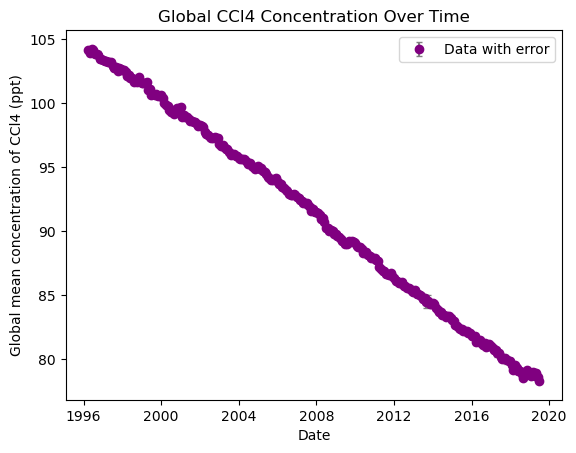

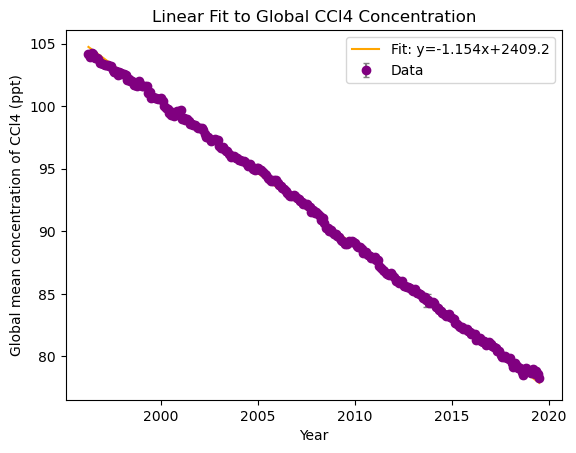

Fit slope m = -1.1544, intercept b = 2409.22
Reduced chi-square = 4.42


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit

# the file using astropy.table.Table
file_path = "C:/Users/ander/python_decal_fa25/Alysah/homework11/global_CCl4_MM.dat"
table = Table.read(file_path, format="ascii")

# convert to Pandas DataFrame with selected columns
df = table.to_pandas()
df = df.rename(columns={
    "CCl4ottoyr": "year",
    "CCl4ottomon": "month",
    "CCl4ottoGLm": "global_mean",
    "CCl4ottoGLsd": "global_sd"
})

# created a date time column
df["date"] = pd.to_datetime(dict(year=df["year"], month=df["month"], day=1))

# keept only relevant columns
df = df[["date", "global_mean", "global_sd"]].dropna()

print(df.head())

# plotted the data with error bars
plt.errorbar(df["date"], df["global_mean"], yerr=df["global_sd"],
             fmt="o", color="purple", ecolor="gray", capsize=2, label="Data with error")
plt.xlabel("Date")
plt.ylabel("Global mean concentration of CCl4 (ppt)")
plt.title("Global CCl4 Concentration Over Time")
plt.legend()
plt.show()

# 4. fitted a model with the linear fit: y = m*x + b
def linear_model(x, m, b):
    return m*x + b

# convertted date time to numeric (years as float)
xdata = df["date"].dt.year + (df["date"].dt.month - 1)/12
ydata = df["global_mean"].values
sigma = df["global_sd"].values

popt, pcov = curve_fit(linear_model, xdata, ydata, sigma=sigma)
m_fit, b_fit = popt

# plotted best fit
plt.errorbar(xdata, ydata, yerr=sigma, fmt="o", color="purple", ecolor="gray", capsize=2, label="Data")
plt.plot(xdata, linear_model(xdata, m_fit, b_fit), color="orange", label=f"Fit: y={m_fit:.3f}x+{b_fit:.1f}")
plt.xlabel("Year")
plt.ylabel("Global mean concentration of CCl4 (ppt)")
plt.title("Linear Fit to Global CCl4 Concentration")
plt.legend()
plt.show()

# 5. calculated a reduced chi-square
yexp = linear_model(xdata, m_fit, b_fit)
chi2 = np.sum(((yexp - ydata)**2) / sigma**2)
reduced_chi2 = chi2 / (len(ydata) - 1)

print(f"Fit slope m = {m_fit:.4f}, intercept b = {b_fit:.2f}")
print(f"Reduced chi-square = {reduced_chi2:.2f}")